In [1]:
!pip install strawberryfields PennyLane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 781.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.0/48.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 69.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.5/103.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.2-py3-none-any.whl size=144548 sh

In [2]:
import strawberryfields as sf
from strawberryfields.ops import *

import numpy as np
from numpy import pi, sqrt

# set the random seed
np.random.seed(42)

In [3]:
prog = sf.Program(3, name="Quantum teleportation") # defining our Quantum program on 3 Quantum registers

We are now using Blackbird programming language

to apply gates and modify stuff we need to be inside of program and apply them on Quantum registers. To do that, we use ```with``` statement

In [4]:
α = 1+0.5j
r = np.abs(α)
ϕ = np.angle(α)

In [6]:
with prog.context as q:
  # prepare initial state
  Coherent(r, ϕ) | q[0]
  Squeezed(-2) | q[0]
  Squeezed(2) | q[2]

  # apply gates
  BS = BSgate(pi/4, pi)
  BS | (q[1], q[2])
  BS | (q[0], q[1])

  # perform homodyne measurement
  MeasureX | q[0]
  MeasureP | q[1]

  # Displacement gates conditioned on
  # the measurements
  Xgate(sqrt(2) * q[0].par) | q[2]
  Zgate(-sqrt(2) * q[1].par) | q[2]

In [10]:
eng = sf.Engine('fock', backend_options={"cutoff_dim": 15})
result = eng.run(prog, shots=1, modes=None, compile_options={})

In [12]:
state = result.state
print(state.dm().shape)

(15, 15, 15, 15, 15, 15)


In [14]:
# calculating the reduced density
rho2 =  np.einsum('kkllij->ij', state.dm())
print(rho2.shape)
probs = np.real_if_close(np.diagonal(rho2))
print(probs)

(15, 15)
[0.30665819 0.14370457 0.07647909 0.09088425 0.05594048 0.05887198
 0.04620712 0.04352952 0.03745901 0.033894   0.03017794 0.02650903
 0.02291758 0.01367794 0.00753544]


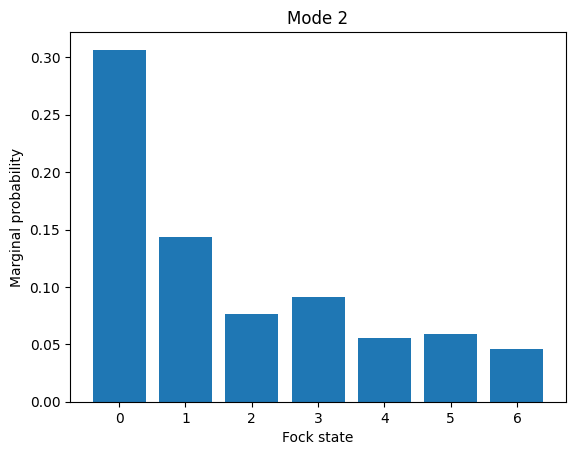

In [15]:
from matplotlib import pyplot as plt
plt.bar(range(7), probs[:7])
plt.xlabel('Fock state')
plt.ylabel('Marginal probability')
plt.title('Mode 2')
plt.show()